# PV Diagram Keplerian Profiling $NH_3$(6,3) W51d2

Text(1, 1, 'NH3')

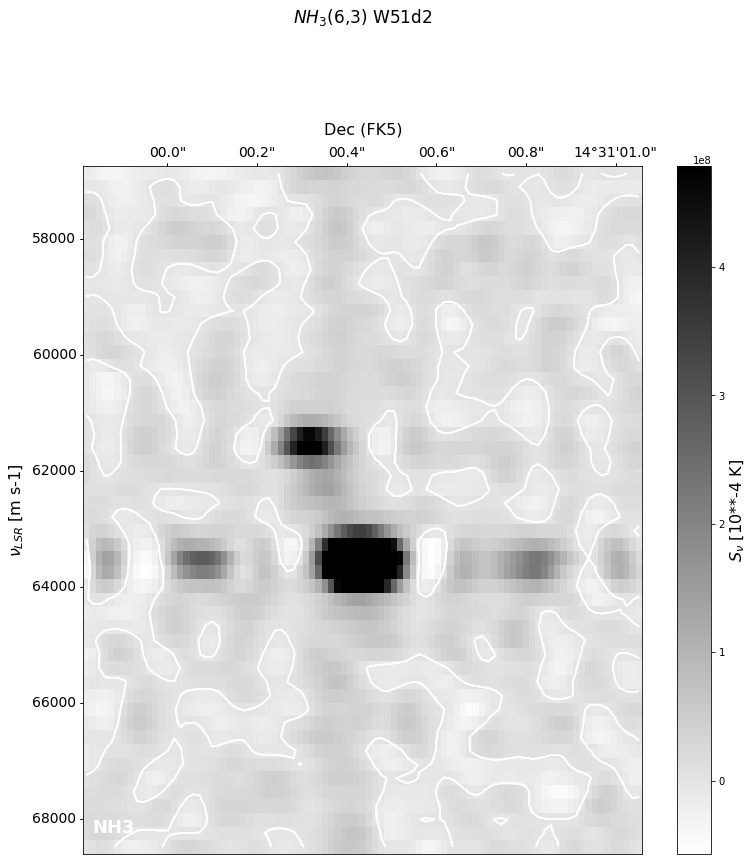

In [3]:
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

fn = '/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_56_corrected2.fits'
fh = SpectralCube.read(fn)
fh = fh.with_spectral_unit(u.km / u.s, velocity_convention='radio')
fh = fh.to(u.K / 10**4)


with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh.header)

from pvextractor import Path
from pvextractor import extract_pv_slice
from spectral_cube import SpectralCube
path1 = Path([(595., 368.), (681., 344.5)])

pv = extract_pv_slice(fh, path1,wcs=ww)

fig = pl.figure(figsize=(10,10))
ax = pl.subplot(projection=ww, slices =(5, 'x','y'))

radesys = ww.wcs.radesys

_ = ax.set_xlabel(f"RA (FK5)", fontsize = 16)    
_ = ax.set_ylabel("$\\nu_{LSR}$ [m s-1]", fontsize = 16)
    
tick_fontsize = 14
fontsize = 16
# ra = ax.coords['ra']
# ra.set_major_formatter('hh:mm:ss.s')
# ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
# ra.ticklabels.set_fontsize(tick_fontsize)
radesys = ww.wcs.radesys

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=1.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)

vrad = ax.coords['vrad']
vrad.ticklabels.set_fontsize(tick_fontsize)
pl.tight_layout()
    

im = ax.imshow(pv.data, cmap='gray_r', norm=visualization.simple_norm(pv.data, stretch='linear', max_percent=99), aspect = 'auto')

cs = ax.contour(pv.data, levels=np.logspace(-2, 0.10, 5), colors='white', alpha=1)
#ax.clabel(cs, inline=False, fontsize=11)

cb = pl.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)
# vrad.set_ticks([np.nanmin(fh[0].data), 63500]*u.m/u.s, ["t","t"])
# ax.set_yticklabels(["t","t"])
pl.tight_layout()
ax.set_title('$NH_3$(6,3) W51d2', y=1.2, fontsize=17)
ax.text(s='NH3', y=1, x=1, color='white', fontsize=18, weight='bold')

In [4]:
def keplerian_profile (offset): #pixel units
    
    from astropy.constants import G
    
    offset_AU = .014  * (51/0.01)* offset #pixel increment of FITS file in arcesec, convert AU -> arcsec in W51
    offset = (offset_AU * u.AU).to(u.m)
    G = G # N*m^2/kg^2
    M = 1.989E30 * u.kg * 10 # mass of the sun in kg
    
    y_top = -(np.sqrt(G*M/offset))/1000
    y_bot = (np.sqrt(G*M/np.negative(offset)))/1000
    
    return np.piecewise(offset, [offset > 0, offset < 0],
                    [lambda offset: y_top, lambda offset: y_bot])


def keplerian_profile_2 (offset): #pixel units
    
    from astropy.constants import G
    
    offset_AU = .014  * (51/0.01)* offset #pixel increment of FITS file in arcesec, convert AU -> arcsec in W51
    offset = (offset_AU * u.AU).to(u.m)
    G = G # N*m^2/kg^2
    M = 1.989E30 * 15 * u.kg # mass of the sun in kg
    
    y_top = -(np.sqrt(G*M/offset))/1000
    y_bot = (np.sqrt(G*M/np.negative(offset)))/1000
    
    return np.piecewise(offset, [offset > 0, offset < 0],
                    [lambda offset: y_top, lambda offset: y_bot])

def keplerian_profile_3 (offset): #pixel units
    
    from astropy.constants import G
    
    offset_AU = .014  * (51/0.01)* offset #pixel increment of FITS file in arcesec, convert AU -> arcsec in W51
    offset = (offset_AU * u.AU).to(u.m)
    G = G # N*m^2/kg^2
    M = 1.989E30 * 20 * u.kg # mass of the sun in kg
    
    y_top = -(np.sqrt(G*M/offset))/1000
    y_bot = (np.sqrt(G*M/np.negative(offset)))/1000
    
    return np.piecewise(offset, [offset > 0, offset < 0],
                    [lambda offset: y_top, lambda offset: y_bot])

In [5]:
keplerian_profile(1)

/home/dealderod/.local/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<Quantity -11.14829472 m / s>

In [6]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    pvww = WCS(pv.header)

In [7]:
pvww

WCS Keywords

Number of WCS axes: 2
CTYPE : 'OFFSET'  'VRAD'  
CRVAL : 0.0  68483.403651419  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 3.888888888889e-06  -237.07117416458  
NAXIS : 89  50

In [8]:
%matplotlib inline

In [9]:
cd /orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/

/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks


/home/dealderod/.local/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/dealderod/.local/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/dealderod/.local/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/dealderod/.local/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/dealderod/.local/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method,

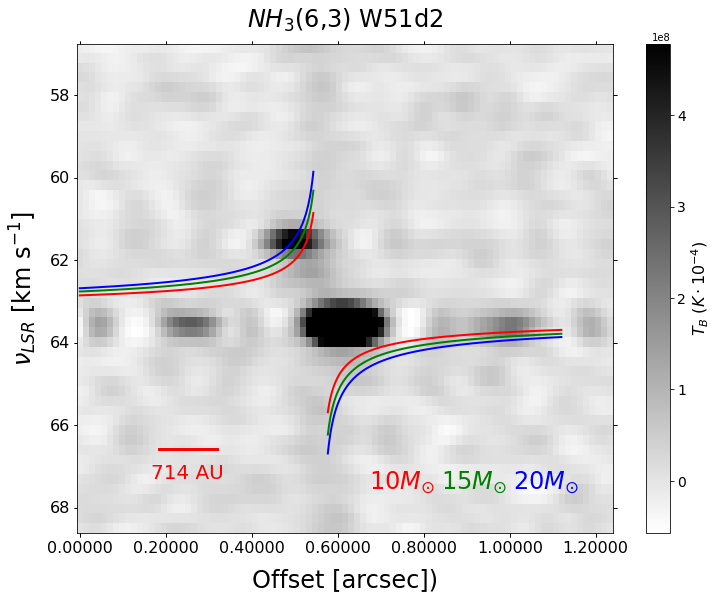

In [24]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(12,9))

ax = pl.subplot(projection=pvww)
x = np.linspace(1.2,40,1000)
x_1 = np.linspace(0,88,1000)



im = ax.imshow(pv.data, cmap='gray_r', norm=visualization.simple_norm(pv.data, stretch='linear', max_percent=99), aspect = 'auto')
ax.plot(x+40, keplerian_profile(x).value+22, transform=ax.get_transform(pvww), linewidth=2, color = "red")
ax.plot(-x+40, keplerian_profile(-x).value+22, transform=ax.get_transform(pvww), linewidth=2, color = "red")

ax.plot(x+40, keplerian_profile_2(x).value+22, transform=ax.get_transform(pvww), linewidth=2, color = "green")
ax.plot(-x+40, keplerian_profile_2(-x).value+22, transform=ax.get_transform(pvww), linewidth=2, color = "green")

ax.plot(x+40, keplerian_profile_3(x).value+22, transform=ax.get_transform(pvww), linewidth=2, color = "blue")
ax.plot(-x+40, keplerian_profile_3(-x).value+22, transform=ax.get_transform(pvww), linewidth=2, color = "blue")



plt.text(48, 4, '$10M_{\odot}$',
         color='red', rotation=0,
         transform=ax.get_transform(pvww), fontsize=24)
plt.text(60, 4, '$15M_{\odot}$',
         color='green', rotation=0,
         transform=ax.get_transform(pvww), fontsize=24)
plt.text(72, 4, '$20M_{\odot}$',
         color='blue', rotation=0,
         transform=ax.get_transform(pvww), fontsize=24)

ax.arrow(18, 8, 0, 0.2,
         head_width=0, head_length=0,
         fc='red', ec='red', width=10,
         transform=ax.get_transform(pvww))
#each pixel is 0.014"
plt.text(11.8, 5, '714 AU',
         color='red', rotation=0,
         transform=ax.get_transform(pvww), fontsize=20)

#ax.plot(x_1,(x_1*0)+14.5, transform=ax.get_transform(pvww), linewidth=2, color = "gray", linestyle='--', alpha =0.5)



_ = ax.set_xlabel("Offset [arcsec])", fontsize = 24)    
_ = ax.set_ylabel("$\\nu_{LSR}$ [km s$^{-1}$]", fontsize = 24)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.set_title('$NH_3$(6,3) W51d2', y=1.02, fontsize=24)
ax.coords[1].set_format_unit(u.km / u.s)
ax.coords[0].set_format_unit(u.arcsec)

cb = pl.colorbar(mappable=im)
cb.set_label("$T_B$ ($K \cdot 10^{-4}$)", fontsize = 16)
cb.ax.tick_params(labelsize=14)
#ax.set(xlim=(0, 1.2), ylim=(55, 70), transform=ax.get_transform(pvww))

plt.savefig('PV_NH3_W51d2_2',dpi=600)

In [7]:

print(0.014 * (51/0.01)*1)

71.4


In [8]:
(71.4 * u.AU).to(u.m)

<Quantity 1.0681288e+13 m>